In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
xs = np.loadtxt("data/four_unicycle_potential/xs_four_unicycle_potential.csv",  delimiter=",")      

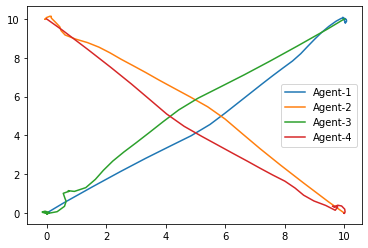

In [3]:
plt.plot(xs[0,0:50],xs[1,0:50],label="Agent-1")
plt.plot(xs[4,0:50],xs[5,0:50],label="Agent-2")
plt.plot(xs[8,0:50],xs[9,0:50],label="Agent-3")
plt.plot(xs[12,0:50],xs[13,0:50],label="Agent-4")
plt.legend()

plt.show()

Player-1 distnace to goal 0.08294394544076926
Player-2 distnace to goal 0.06090713191741892
Player-3 distnace to goal 0.007924316770566635
Closest distance between Player-1 and Player-2 0.3052164150831147
Closest distance between Player-1 and Player-3 0.8130546981250263
Closest distance between Player-2 and Player-3 0.4652225611304319


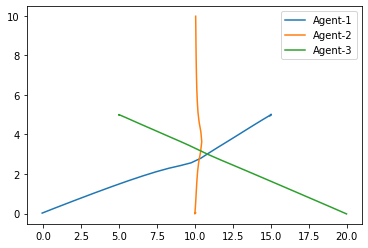

Player-1 distnace to goal 0.14952598320618898
Player-2 distnace to goal 0.17399265295784133
Player-3 distnace to goal 0.026159948904823666
Closest distance between Player-1 and Player-2 0.9224051891678444
Closest distance between Player-1 and Player-3 1.071464916706401
Closest distance between Player-2 and Player-3 1.320075063206363


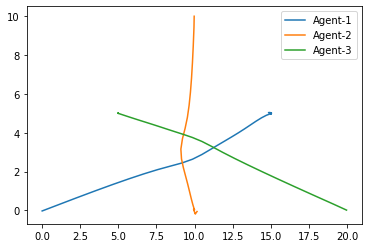

Player-1 distnace to goal 0.011562667557523037
Player-2 distnace to goal 0.027432016566465715
Player-3 distnace to goal 0.0035299482279241997
Closest distance between Player-1 and Player-2 0.9153710440542705
Closest distance between Player-1 and Player-3 1.042829159710391
Closest distance between Player-2 and Player-3 1.3051314356473136


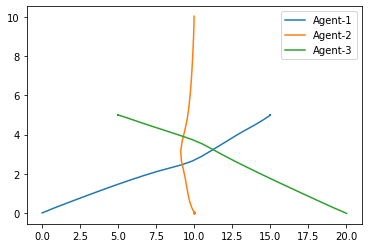

Player-1 distnace to goal 0.06965624001951981
Player-2 distnace to goal 0.035079900593709606
Player-3 distnace to goal 0.01967543940761276
Closest distance between Player-1 and Player-2 1.7921742905945741
Closest distance between Player-1 and Player-3 0.6454193616610638
Closest distance between Player-2 and Player-3 1.6634149263472127


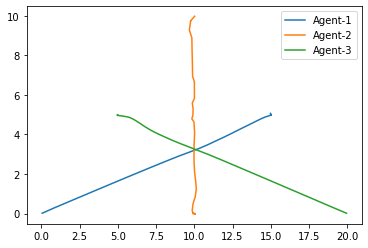

Player-1 distnace to goal 0.15910549772532162
Player-2 distnace to goal 0.10563095851837598
Player-3 distnace to goal 0.16164806856316946
Closest distance between Player-1 and Player-2 0.9054574191020458
Closest distance between Player-1 and Player-3 1.0394127471759562
Closest distance between Player-2 and Player-3 1.3236055604568373


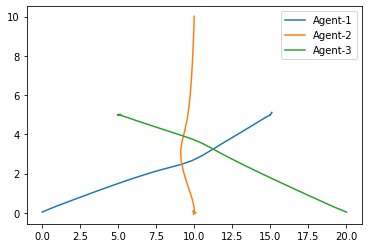

Player-1 distnace to goal 0.086990131895227
Player-2 distnace to goal 0.09952680791066376
Player-3 distnace to goal 0.005022855292165751
Closest distance between Player-1 and Player-2 1.254120602128811
Closest distance between Player-1 and Player-3 0.6133138407623336
Closest distance between Player-2 and Player-3 0.973538234455505


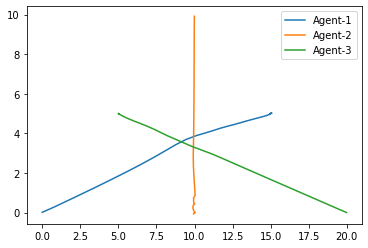

Player-1 distnace to goal 0.055490194404441466
Player-2 distnace to goal 0.05910246782453685
Player-3 distnace to goal 0.0018854146761597122
Closest distance between Player-1 and Player-2 0.8769475369670147
Closest distance between Player-1 and Player-3 0.5393889282399935
Closest distance between Player-2 and Player-3 1.092680114112538


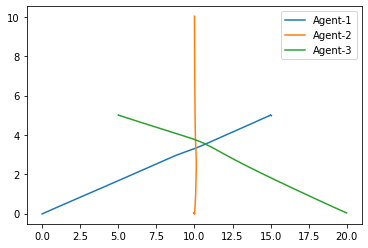

Player-1 distnace to goal 0.0660263286081895
Player-2 distnace to goal 0.07891290752178612
Player-3 distnace to goal 0.004546621206636142
Closest distance between Player-1 and Player-2 0.9069882473437938
Closest distance between Player-1 and Player-3 1.0390863277407354
Closest distance between Player-2 and Player-3 1.3174917476649912


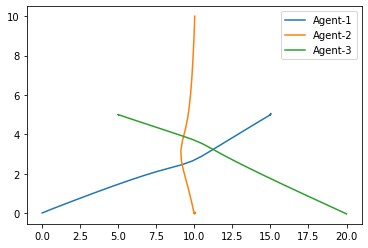

Player-1 distnace to goal 0.13462768509304596
Player-2 distnace to goal 0.05240652999881398
Player-3 distnace to goal 0.005899969257188186
Closest distance between Player-1 and Player-2 0.9203542859881229
Closest distance between Player-1 and Player-3 1.0440967714228504
Closest distance between Player-2 and Player-3 1.3050350498720023


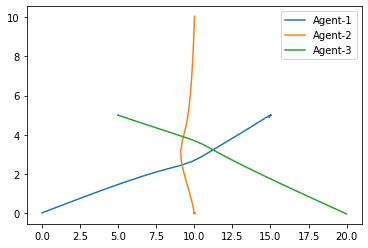

Player-1 distnace to goal 0.017368169739539713
Player-2 distnace to goal 0.02757770722957164
Player-3 distnace to goal 0.003182445046695078
Closest distance between Player-1 and Player-2 1.4365442551396927
Closest distance between Player-1 and Player-3 0.9655226964688297
Closest distance between Player-2 and Player-3 0.7617243051948656


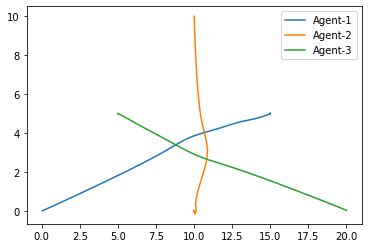

In [13]:
for i in range(10):
    xs = np.loadtxt("data/three_unicycle_potential_mc/xs_three_unicycle_potential"+str(i)+".csv",  delimiter=",")
    x1 = xs[0:2,:]
    x2 = xs[4:6,:]
    x3 = xs[8:10,:]
    
    print("Player-1 distnace to goal",distance_to_goal(x1[:,-1],player_goals[0,:]))
    print("Player-2 distnace to goal",distance_to_goal(x2[:,-1],player_goals[1,:]))
    print("Player-3 distnace to goal",distance_to_goal(x3[:,-1],player_goals[2,:]))

    print("Closest distance between Player-1 and Player-2",closest_distance(x1,x2))
    print("Closest distance between Player-1 and Player-3",closest_distance(x1,x3))
    print("Closest distance between Player-2 and Player-3",closest_distance(x2,x3))
    
    plt.plot(xs[0,0:50],xs[1,0:50],label="Agent-1")
    plt.plot(xs[4,0:50],xs[5,0:50],label="Agent-2")
    plt.plot(xs[8,0:50],xs[9,0:50],label="Agent-3")
    #plt.plot(xs[12,0:50],xs[13,0:50],label="Agent-4")
    plt.legend()

    plt.show()

In [10]:
def distance_to_goal(x,goal):
    return np.sqrt(((x-goal)**2).sum())

def closest_distance(x,y):
    return np.min(np.sqrt(np.sum((x-y)**2,axis=0)))

player_goals = np.array([[15,5],[10,0],[5,5]])

In [11]:
x1 = xs[0:2,:]
x2 = xs[4:6,:]
x3 = xs[8:10,:]

In [12]:
print("Player-1 distnace to goal",distance_to_goal(x1[:,-1],player_goals[0,:]))
print("Player-2 distnace to goal",distance_to_goal(x2[:,-1],player_goals[1,:]))
print("Player-3 distnace to goal",distance_to_goal(x3[:,-1],player_goals[2,:]))

print("Closest distance between Player-1 and Player-2",closest_distance(x1,x2))
print("Closest distance between Player-1 and Player-3",closest_distance(x1,x3))
print("Closest distance between Player-2 and Player-3",closest_distance(x2,x3))

Player-1 distnace to goal 0.017368169739539713
Player-2 distnace to goal 0.02757770722957164
Player-3 distnace to goal 0.003182445046695078
Closest distance between Player-1 and Player-2 1.4365442551396927
Closest distance between Player-1 and Player-3 0.9655226964688297
Closest distance between Player-2 and Player-3 0.7617243051948656
